**1. Write a python program which searches all the product under a particular product from www.amazon.in. The
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for
guitars.**

**2. In the above question, now scrape the following details of each product listed in first 3 pages of your search
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then
scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.**

**NOTE:-First Two question has been solved by the below code**

In [85]:
from selenium import webdriver
from urllib.parse import quote
from bs4 import BeautifulSoup
import pandas as pd

# Set the path to the downloaded ChromeDriver executable
webdriver_path = "/Users/siddhant/Downloads/chromedriver-mac-arm64/chromedriver"

# Create a WebDriver instance using the specified path
driver = webdriver.Chrome(executable_path=webdriver_path)

# Open Amazon website
driver.get("https://www.amazon.in")

# Take user input for the search query
search_query = input("Enter your search query: ")
search_query_encoded = quote(search_query)  # Encode the query for the URL

# Construct the Amazon India search URL
amazon_url = f"https://www.amazon.in/s?k={search_query_encoded}"

# Open the webpage using Selenium
driver.get(amazon_url)
webpage_content = driver.page_source

# Create a BeautifulSoup object
soup = BeautifulSoup(webpage_content, 'html.parser')

# Find all divs with class="s-card-container" and extract relevant information
product_data = []

for div in soup.find_all('div', class_='s-card-container'):
    product_name_elem = div.find('h2', class_='a-size-mini a-spacing-none a-color-base s-line-clamp-2')
    product_name = product_name_elem.get_text() if product_name_elem else "NaN"
    
    try:
        price_span = div.find('span', class_='a-offscreen')
        price = price_span.get_text() if price_span else "NaN"
    except AttributeError:
        price = "NaN"
    
    rating_span = div.find('span', class_='a-icon-alt')
    rating = rating_span.get_text() if rating_span else "NaN"
    
    return_exchange_element = div.find('span', class_='return-exchange')
    return_exchange = return_exchange_element.get_text() if return_exchange_element else "NaN"
    
    expected_date_elem = div.find("div", class_="a-color-secondary")
    expected_date = expected_date_elem.get_text(strip=True) if expected_date_elem else "NaN"
    
    availability_elem = div.find('div', class_='a-row a-size-base a-color-secondary s-align-children-center')
    availability = availability_elem.get_text(strip=True) if availability_elem else "NaN"
    
    product_url = div.find('a', class_='a-link-normal')['href']
    product_url = f"https://www.amazon.in{product_url}" if product_url.startswith("/") else product_url
    
    product_data.append({
        'Product Name': product_name,
        'Product Price': price,
        'Product Ratings': rating,
        'Return/Exchange': return_exchange,
        'Expected Delivery': expected_date,
        'Availability': availability,
        'Product URL': product_url
    })

# Save the data in a DataFrame
product_df = pd.DataFrame(product_data)

# Save the DataFrame to a CSV file
csv_filename = f"{search_query.replace(' ', '_')}_product_data.csv"
product_df.to_csv(csv_filename, index=False)

print("Data saved to CSV file:", csv_filename)
driver.quit()
product_df

/var/folders/f7/7l8ws9yx7ybdzmwks1n4tty00000gn/T/ipykernel_6727/3146933959.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=webdriver_path)


Enter your search query: manga
Data saved to CSV file: manga_product_data.csv


,Product Name,Product Price,Product Ratings,Return/Exchange,Expected Delivery,Availability,Product URL
0,DEMONSLAYER VOLUMES 1-23 (Demon Slayer: Kimets...,"₹4,999",3.4 out of 5 stars,NaN,byKoyoharu Gotouge|1 January 2021,"Get itMonday, 11 September-Tuesday, 12 September",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Berserk Deluxe Volume 6,"₹2,379",5.0 out of 5 stars,NaN,byKentaro MiuraandDuane Johnson|24 November 2020,"Get it byFriday, 1 SeptemberFREE Delivery by A...",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Attack on Titan Sampler,₹0,4.1 out of 5 stars,NaN,byHajime Isayama|1 September 2015,Available instantly,https://www.amazon.in/Attack-Titan-Sampler-Haj...
3,Blue Lock,₹595,4.8 out of 5 stars,NaN,byMuneyuki KaneshiroandYusuke Nomura|21 June 2022,"Get it byFriday, 1 SeptemberFREE Delivery by A...",https://www.amazon.in/Blue-Lock-1-Muneyuki-Kan...
4,Sch.o.ol punishm.e.nt_Y.a.oi M.anga,₹0,1.0 out of 5 stars,NaN,byRobert D. Diaz|19 August 2023,Available instantly,https://www.amazon.in/Sch-ol-punishm-nt_Y-M-an...
5,"Jujutsu Kaisen, Vol. 1: Volume 1",₹411,4.7 out of 5 stars,NaN,byGege Akutami|3 December 2019,"Get it byFriday, 1 SeptemberFREE Delivery over...",https://www.amazon.in/Jujutsu-Kaisen-Vol-Gege-...
6,"Naruto, Volume 1",₹504,4.4 out of 5 stars,NaN,byMasashi Kishimoto|9 July 2003,"Get it byFriday, 1 SeptemberFREE Delivery by A...",https://www.amazon.in/Naruto-01-Masashi-Kishim...
7,Parasyte Full Color Collection 2,"₹1,023.81",5.0 out of 5 stars,NaN,byHitoshi Iwaaki|14 February 2023,"Get it byFriday, 1 SeptemberFREE Delivery by A...",https://www.amazon.in/Parasyte-Full-Color-Coll...
8,"My Hero Academia, Vol. 1 (Volume 1): Izuku Mid...",₹469,4.8 out of 5 stars,NaN,byKohei Horikoshi|4 August 2015,"Get it byFriday, 1 SeptemberFREE Delivery over...",https://www.amazon.in/My-Hero-Academia-Vol-1/d...
9,"Your Name., Volume 1 (Your Name. (M (your name...",₹946,4.7 out of 5 stars,NaN,byMakoto ShinkaiandRanmaru Kotone|20 June 2017,"Get it byTuesday, 5 SeptemberFREE Delivery by ...",https://www.amazon.in/Your-Name-Manga-name-man...


**3.Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.**

/var/folders/f7/7l8ws9yx7ybdzmwks1n4tty00000gn/T/ipykernel_6727/773781692.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=webdriver_path)


Keyword: fruits
Image 1: 
Image 2: 
Image 3: 
Image 4: 
Image 5: 
Image 6: 
Image 7: 
Image 8: 
Image 9: 
Image 10: 

Keyword: cars
Image 1: 
Image 2: 
Image 3: 
Image 4: 
Image 5: 
Image 6: 
Image 7: 
Image 8: 
Image 9: 
Image 10: 

Keyword: Machine Learning
Image 1: 
Image 2: 
Image 3: 
Image 4: 
Image 5: 
Image 6: 
Image 7: 
Image 8: 
Image 9: 
Image 10: 

Keyword: Guitar
Image 1: 
Image 2: 
Image 3: 
Image 4: 
Image 5: 
Image 6: 
Image 7: 
Image 8: 
Image 9: 
Image 10: 

Keyword: Cakes
Image 1: 
Image 2: 
Image 3: 
Image 4: 
Image 5: 
Image 6: 
Image 7: 
Image 8: 
Image 9: 
Image 10: 


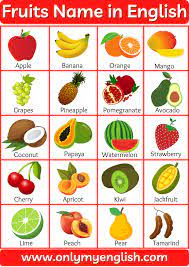
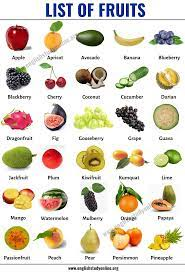
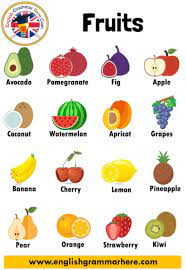
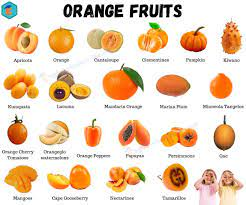
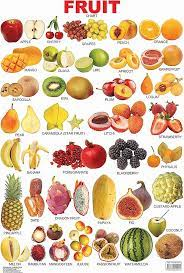
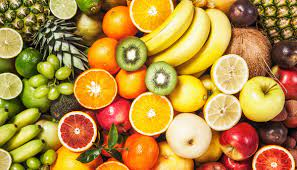
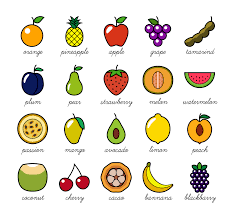
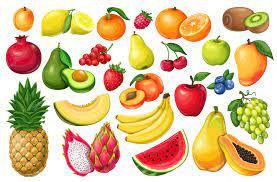
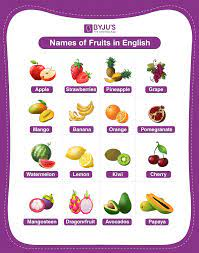
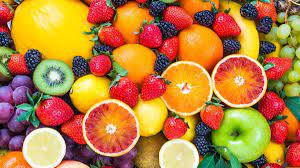
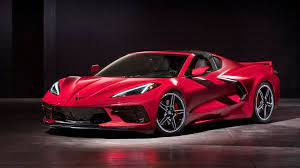
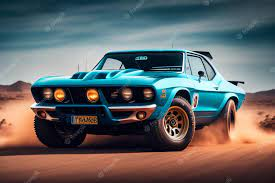
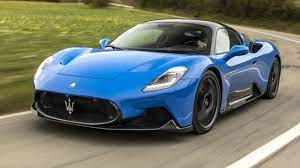
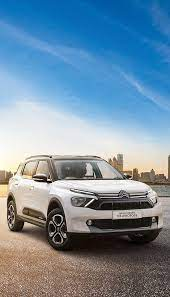
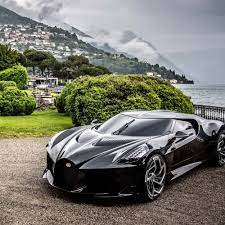
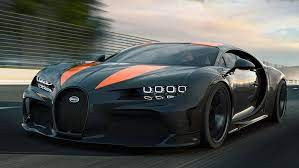
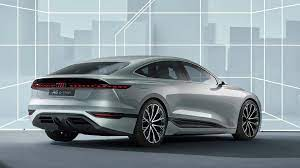
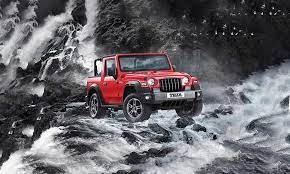
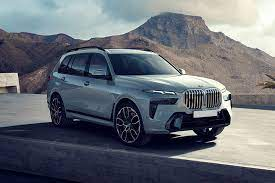
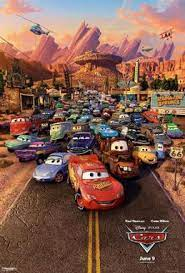
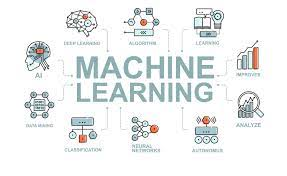
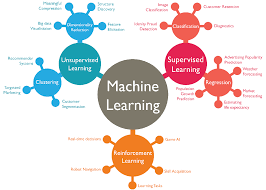
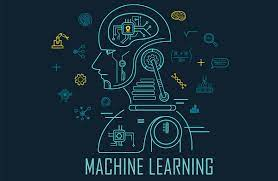
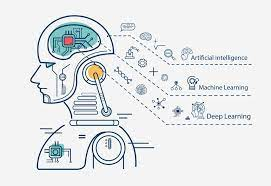
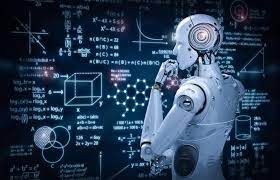
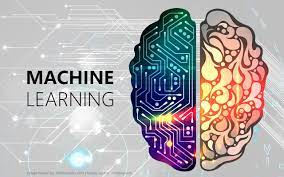
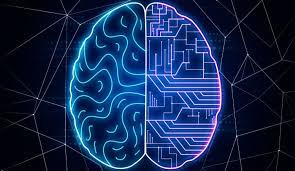
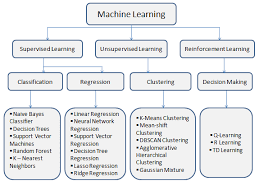
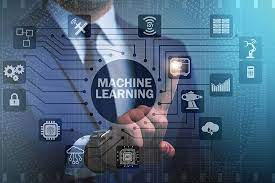
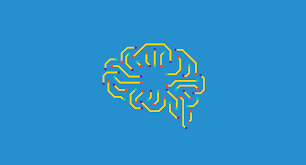
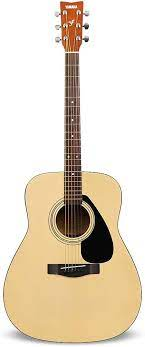
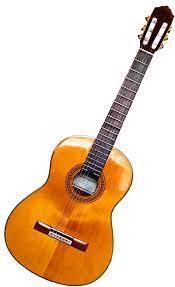
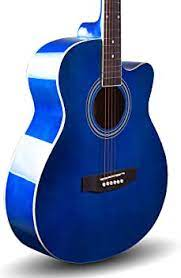
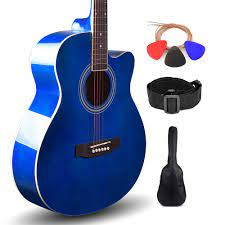
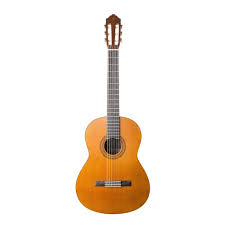
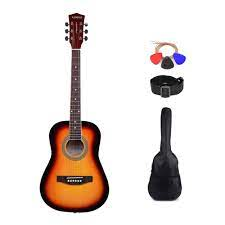
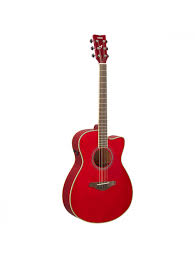
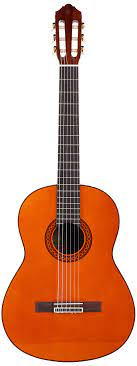
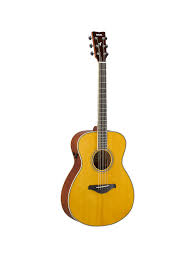
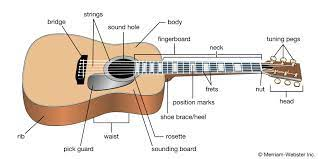
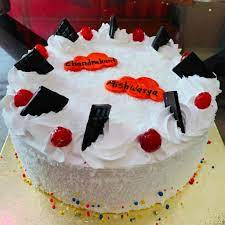
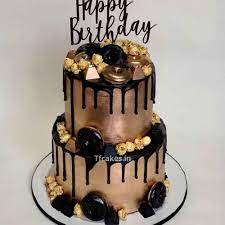
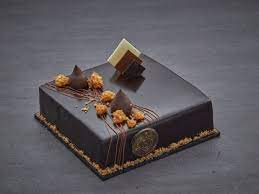
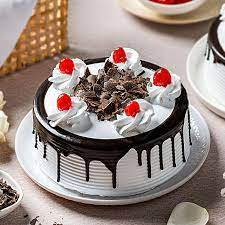
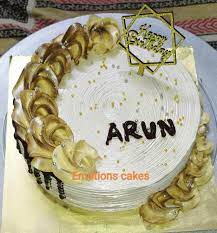
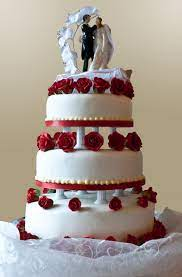
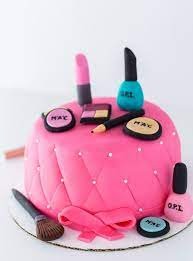
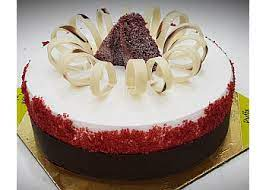
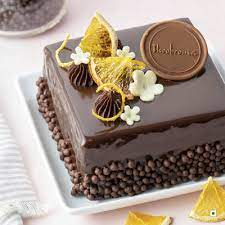
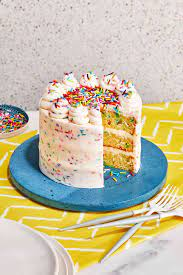

In [102]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# Set the path to the downloaded ChromeDriver executable
webdriver_path = "/Users/siddhant/Downloads/chromedriver-mac-arm64/chromedriver"

# Create a WebDriver instance using the specified path
driver = webdriver.Chrome(executable_path=webdriver_path)

# List of keywords
keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']

# Store image URLs for each keyword
image_urls_by_keyword = {}

# Iterate through each keyword
for keyword in keywords:
    # Open Google Images website
    driver.get("https://www.google.com/imghp")
    
    # Find the search bar and input the keyword
    search_bar = driver.find_element(By.XPATH, "//textarea[@aria-label='Search']")
    search_bar.send_keys(keyword)
    search_bar.send_keys(Keys.RETURN)
    
    # Scroll to load more images
    for _ in range(5):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
    
    # Find image elements
    image_elements = driver.find_elements(By.XPATH, "//img[contains(@class, 'rg_i')]")
    
    # Store the first 10 image URLs for the keyword
    image_urls = [img.get_attribute('src') for img in image_elements[:10]]
    image_urls_by_keyword[keyword] = image_urls

# Close the WebDriver
driver.quit()

# Print the image URLs for each keyword
for keyword, image_urls in image_urls_by_keyword.items():
    print(f"Keyword: {keyword}")
    for index, image_url in enumerate(image_urls):
        print(f"Image {index + 1}: {image_url}")
    print()


**4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the
details is missing then replace it by “- “. Save your results in a dataframe and CSV.** 

In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the Flipkart search page
url = "https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all divs with the specified class
divs = soup.find_all("div", class_="_1AtVbE col-12-12")

# Initialize lists to store scraped data
brands = []
smartphone_names = []
colors = []
ram = []
storage = []
primary_camera = []
secondary_camera = []
display_size = []
battery_capacity = []
prices = []
product_urls = []

# Iterate through each div and scrape the details
for div in divs:
    try:
        smartphone_name = div.find("div", class_="_4rR01T").text
    except:
        smartphone_name = "-"

    specifications = div.find_all("li", class_="rgWa7D")
    specification_text = [spec.text for spec in specifications]

    brand = specification_text[3].split(" ")[0] if len(specification_text) >= 4 else "-"
    color = specification_text[0].split(" ")[-1] if len(specification_text) >= 1 else "-"
    ram_storage = specification_text[1] if len(specification_text) >= 2 else "-"
    display = specification_text[2] if len(specification_text) >= 3 else "-"
    battery = specification_text[3] if len(specification_text) >= 4 else "-"
    price = div.find("div", class_="_30jeq3 _1_WHN1").text if div.find("div", class_="_30jeq3 _1_WHN1") else "-"
    
    product_link = div.find("a", class_="_1fQZEK")
    if product_link:
        product_url = "https://www.flipkart.com" + product_link["href"]
        product_urls.append(product_url)
    else:
        product_urls.append("-")

    brands.append(brand)
    smartphone_names.append(smartphone_name)
    colors.append(color)
    ram.append(ram_storage)
    storage.append(ram_storage)
    primary_camera.append(specification_text[4] if len(specification_text) >= 5 else "-")
    secondary_camera.append(specification_text[5] if len(specification_text) >= 6 else "-")
    display_size.append(display)
    battery_capacity.append(battery)
    prices.append(price)
    #product_urls.append("https://www.flipkart.com" + div.find("a", class_="_1fQZEK")["href"])

# Create a DataFrame
data = {
    "Brand": brands,
    "Smartphone Name": smartphone_names,
    "Color": colors,
    "RAM": ram,
    "Storage(ROM)": storage,
    "Primary Camera": primary_camera,
    "Secondary Camera": secondary_camera,
    "Display Size": display_size,
    "Battery Capacity": battery_capacity,
    "Price": prices,
    "Product URL": product_urls
}

df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv("smartphones.csv", index=False)

print("Scraping and saving complete.")
df

Scraping and saving complete.


,Brand,Smartphone Name,Color,RAM,Storage(ROM),Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Product URL
0,-,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,-
2,5000,"POCO M6 Pro 5G (Power Black, 128 GB)",TB,17.25 cm (6.79 inch) Full HD+ Display,17.25 cm (6.79 inch) Full HD+ Display,Snapdragon 4 Gen 2 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,"₹12,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
3,5000,"POCO M6 Pro 5G (Power Black, 64 GB)",TB,17.25 cm (6.79 inch) Full HD+ Display,17.25 cm (6.79 inch) Full HD+ Display,Snapdragon 4 Gen 2 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,"₹10,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
4,5000,"POCO C51 (Power Black, 64 GB)",TB,16.56 cm (6.52 inch) HD+ Display,16.56 cm (6.52 inch) HD+ Display,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,"₹8,499",https://www.flipkart.com/poco-c51-power-black-...
5,5000,"POCO M6 Pro 5G (Forest Green, 64 GB)",TB,17.25 cm (6.79 inch) Full HD+ Display,17.25 cm (6.79 inch) Full HD+ Display,Snapdragon 4 Gen 2 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,"₹10,999",https://www.flipkart.com/poco-m6-pro-5g-forest...
6,5000,"POCO C51 (Royal Blue, 64 GB)",TB,16.56 cm (6.52 inch) HD+ Display,16.56 cm (6.52 inch) HD+ Display,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,"₹8,499",https://www.flipkart.com/poco-c51-royal-blue-6...
7,5000,"REDMI 12 (Moonstone Silver, 128 GB)",TB,17.25 cm (6.79 inch) Full HD+ Display,17.25 cm (6.79 inch) Full HD+ Display,Helio G88 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,50MP + 8MP + 2MP | 8MP Front Camera,5000 mAh Battery,"₹9,999",https://www.flipkart.com/redmi-12-moonstone-si...
8,5000,"POCO C50 (Royal Blue, 32 GB)",GB,16.56 cm (6.52 inch) HD+ Display,16.56 cm (6.52 inch) HD+ Display,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",1 Year Manufacturer Warranty for Phone and 6 M...,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"₹6,499",https://www.flipkart.com/poco-c50-royal-blue-3...
9,5000,"POCO C55 (Cool Blue, 128 GB)",TB,17.04 cm (6.71 inch) HD+ Display,17.04 cm (6.71 inch) HD+ Display,Mediatek Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,50MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,"₹10,999",https://www.flipkart.com/poco-c55-cool-blue-12...


**5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.**

In [132]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# Path to the downloaded ChromeDriver executable
webdriver_path = "/Users/siddhant/Downloads/chromedriver-mac-arm64/chromedriver"

# Initialize the Chrome driver
driver = webdriver.Chrome(executable_path=webdriver_path)

def search_location(location_name):
    # Open Google Maps in the browser
    driver.get("https://www.google.com/maps")
    
    # Find the search box element and enter the location name
    search_box = driver.find_element(By.ID, "searchboxinput")
    search_box.send_keys(location_name)
    search_box.send_keys(Keys.RETURN)
    
    # Wait for the map to load
    driver.implicitly_wait(10)

# Search for New York
search_location("New York")

# Wait for a few seconds to load the results
driver.implicitly_wait(10)
lat_lng_div = soup.find('div', class_='mLuXec')

# Extract latitude and longitude
lat_lng_text = lat_lng_div.text
latitude, longitude = map(float, lat_lng_text.split(', '))

print("Latitude:", latitude)
print("Longitude:", longitude)
# Find the element containing latitude and longitude
#lat_lng_element = driver.find_element(By.CLASS_NAME, "mLuXec")

# Get the text containing latitude and longitude
#lat_lng_text = lat_lng_element.text

# Close the browser window
driver.quit()



/var/folders/f7/7l8ws9yx7ybdzmwks1n4tty00000gn/T/ipykernel_6727/2599734841.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=webdriver_path)


Latitude: 40.7168
Longitude: -73.99827


**6. Write a program to scrap all the available details of best gaming laptops from digit.in.**

In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the digit.in search page for gaming laptops
url = "https://www.digit.in/search?keyword=gaming+laptop"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all divs with the specified class
divs = soup.find_all("div", class_="searchPage")

# Initialize lists to store scraped data
laptop_names = []
release_dates = []

# Iterate through each div and extract laptop details
for div in divs:
    laptop_name = div.find("div", class_="searchProduct-desc").text.strip()
    release_date = div.find("span").text.strip()
    
    laptop_names.append(laptop_name)
    release_dates.append(release_date)

# Create a DataFrame
data = {
    "Laptop Name": laptop_names,
    "Release Date": release_dates
}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Laptop Name,Release Date
0,Lenovo Ideapad gaming 3,"Nov 09, 2022"
1,Lenovo IdeaPad Gaming 3i,"Nov 10, 2022"
2,Alienware M14x,"Mar 28, 2021"
3,Acer Predator Triton 700,"Apr 09, 2019"
4,HP Envy 15-k006tx,"Apr 09, 2019"
5,MSI Gaming Raider,"Nov 15, 2022"
6,ASUS TUF Gaming F15,"Nov 16, 2022"
7,Asus TUF Gaming FX505,"Jun 21, 2022"
8,Dell G15 Gaming Ryzen 5 6-core-5600H (2021),"May 24, 2022"
9,Alienware x14 Gaming Laptop,"Sep 26, 2022"


**7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.**

In [20]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Initialize the Selenium web driver (make sure you have the appropriate driver installed)
webdriver_path = "/Users/siddhant/Downloads/chromedriver-mac-arm64/chromedriver"

# Initialize the Chrome driver
driver = webdriver.Chrome(executable_path=webdriver_path)
# Open the Forbes Real-Time Billionaires page
# Open Forbes Billionaires page
url = "https://www.forbes.com/billionaires/"
driver.get(url)

# Scroll to load all billionaires
scroll_pause_time = 2  # Adjust as needed
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause_time)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Find all billionaire elements
billionaires = driver.find_elements(By.CLASS_NAME, "TableRow_row__L-0Km")

# Initialize empty lists to store data
all_billionaires_data = []

# Extract data for each billionaire
for billionaire in billionaires:
    data = {}
    data['Rank'] = billionaire.find_element(By.CLASS_NAME, "Table_rank___YBhk").text
    data['Name'] = billionaire.find_elements(By.CLASS_NAME, "Table_dataCell__2QCve")[0].text
    data['Net Worth'] = billionaire.find_element(By.CLASS_NAME, "Table_netWorth___L4R5").text
    data['Age'] = billionaire.find_elements(By.CLASS_NAME, "Table_dataCell__2QCve")[1].text
    data['Citizenship'] = billionaire.find_elements(By.CLASS_NAME, "Table_dataCell__2QCve")[2].text
    data['Source'] = billionaire.find_elements(By.CLASS_NAME, "Table_dataCell__2QCve")[3].text
    data['Industry'] = billionaire.find_elements(By.CLASS_NAME, "Table_dataCell__2QCve")[4].text
    all_billionaires_data.append(data)

# Close the web driver
driver.quit()
df = pd.DataFrame(all_billionaires_data)
df
# Print the extracted data or use it as needed
for billionaire_data in all_billionaires_data:
    print(billionaire_data)


/var/folders/f7/7l8ws9yx7ybdzmwks1n4tty00000gn/T/ipykernel_3849/1668449337.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=webdriver_path)


,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,1,1,$211 B,Bernard Arnault & family,$211 B,74,LVMH
1,2,2,$180 B,Elon Musk,$180 B,51,"Tesla, SpaceX"
2,3,3,$114 B,Jeff Bezos,$114 B,59,Amazon
3,4,4,$107 B,Larry Ellison,$107 B,78,Oracle
4,5,5,$106 B,Warren Buffett,$106 B,92,Berkshire Hathaway
...,...,...,...,...,...,...,...
195,195,195,$9.6 B,Jin Baofang,$9.6 B,70,Solar panels
196,195,195,$9.6 B,Luo Liguo & family,$9.6 B,67,Chemicals
197,195,195,$9.6 B,Marijke Mars,$9.6 B,58,"Candy, pet food"
198,195,195,$9.6 B,Pamela Mars,$9.6 B,62,"Candy, pet food"


**8.Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted
from any YouTube Video.**

**NOTE**

**1.For this question i am using API to fetch the data from you tube since it's leagal and much faster to extract the data.**

**2.To use the code insert your API_KEY in API_KEY variable.**

**3.Video has only 487 comments so the code only fetched 487 comments.**

In [6]:
#note the video used hase only 487 comments 

from googleapiclient.discovery import build
import pandas as pd
API_KEY = 'INSERT YOUR API KEY' # Replace 'YOUR_API_KEY' with your actual API key


#YOUTUBE VIDEO LINK FOR REFERENCE:-https://www.youtube.com/watch?v=NU93_ezf2hE

VIDEO_ID = 'NU93_ezf2hE'  # Replace with the YouTube video ID

youtube = build('youtube', 'v3', developerKey=API_KEY)

# Get video comments
def get_comments(video_id):
    comments = []
    nextPageToken = None

    while True:
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat='plainText',
            maxResults=100,
            pageToken=nextPageToken
        ).execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append({
                'text': comment['textDisplay'],
                'upvotes': comment['likeCount'],
                'time': comment['publishedAt']
            })

        nextPageToken = response.get('nextPageToken')

        if not nextPageToken:
            break

    return comments

if __name__ == '__main__':
    video_comments = get_comments(VIDEO_ID)
    df = pd.DataFrame(video_comments)
    print(df)
    #print(df)

    #print(video_comments[:500])  # Print the first 500 comments


                                                  text  upvotes  \
0    Manny Pacquiao | DAZN Boxing ► https://bit.ly/...       69   
1                                      Inoue is better        0   
2                                   THE PEOPLE’S CHAMP        0   
3                                                 My 🐐        0   
4                                  Oscar De Loya China        1   
..                                                 ...      ...   
482                                          I'm first        0   
483                                              First        0   
484                                              first        0   
485        Manny pacman is better than Muhammad ali!!!        2   
486                                              Booom        1   

                     time  
0    2022-03-09T11:28:32Z  
1    2023-08-31T04:47:50Z  
2    2023-08-30T15:49:17Z  
3    2023-08-29T12:40:58Z  
4    2023-08-28T09:34:34Z  
..                    ...  

In [8]:
#487 youtube commments
df

,text,upvotes,time
0,Manny Pacquiao | DAZN Boxing ► https://bit.ly/...,69,2022-03-09T11:28:32Z
1,Inoue is better,0,2023-08-31T04:47:50Z
2,THE PEOPLE’S CHAMP,0,2023-08-30T15:49:17Z
3,My 🐐,0,2023-08-29T12:40:58Z
4,Oscar De Loya China,1,2023-08-28T09:34:34Z
...,...,...,...
482,I'm first,0,2021-08-20T22:24:27Z
483,First,0,2021-08-20T22:24:24Z
484,first,0,2021-08-20T22:24:20Z
485,Manny pacman is better than Muhammad ali!!!,2,2021-08-20T22:24:19Z


**9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.**

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = "https://www.hostelworld.com/st/hostels/europe/england/london/?source=ppc_gooads_brand_dsk_search_ds_en_row&network=g&campaign_id=15546410541&adgroup_id=130557330189&criteria_id=kwd-11065199600&creative_id=573497387428&location_physical_id=9304056&location_interest_id=1006886&adposition=null&uniqueclickID=13110568540290269022&sub_keyword=hostelworld%20london&sub_ad=e&sub_publisher=ADW&gclsrc=aw.ds&gclid=Cj0KCQjwusunBhCYARIsAFBsUP_kL1plCECG5l9ta2S3eHuloOuJPBVJp9PFbCtWIPDYu7ZObM3IvysaApmjEALw_wcB"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all hostel elements using BeautifulSoup
hostel_elements = soup.find_all('div', class_="property-info-container")

# Create empty lists to store data
hostel_names = []
descriptions = []
ratings = []
total_reviews = []
distances = []
facilities = []
privates_prices = []
dorms_prices = []

# Extract required information for each hostel
for hostel in hostel_elements:
    name = hostel.find(class_='property-name').text
    description = hostel.find(class_='property-description').text
    rating = hostel.find(class_='number').text
    total_review = hostel.find(class_='left-margin').text.strip('()')
    distance = hostel.find(class_='distance-description').text
    facility_elements = hostel.find_all(class_='badge-label')
    facility_list = [facility.text for facility in facility_elements]
    facility_text = ', '.join(facility_list)

    # Handle the case where no prices are available
    privates_price_element = hostel.find('div', text='Privates From')
    privates_price = privates_price_element.find_next('strong').text if privates_price_element else 'N/A'

    dorms_price_element = hostel.find('div', text='Dorms From')
    dorms_price = dorms_price_element.find_next('strong').text if dorms_price_element else 'N/A'

    # Append data to lists
    hostel_names.append(name)
    descriptions.append(description)
    ratings.append(rating)
    total_reviews.append(total_review)
    distances.append(distance)
    facilities.append(facility_text)
    privates_prices.append(privates_price)
    dorms_prices.append(dorms_price)

# Create a Pandas DataFrame
data = {
    'Hostel Name': hostel_names,
    'Description': descriptions,
    'Rating': ratings,
    'Total Reviews': total_reviews,
    'Distance from City Centre': distances,
    'Facilities': facilities,
    'Privates From Price': privates_prices,
    'Dorms From Price': dorms_prices
}

df = pd.DataFrame(data)

# Print the DataFrame
df

/var/folders/f7/7l8ws9yx7ybdzmwks1n4tty00000gn/T/ipykernel_3849/1166179211.py:39: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  privates_price_element = hostel.find('div', text='Privates From')
/var/folders/f7/7l8ws9yx7ybdzmwks1n4tty00000gn/T/ipykernel_3849/1166179211.py:42: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  dorms_price_element = hostel.find('div', text='Dorms From')


,Hostel Name,Description,Rating,Total Reviews,Distance from City Centre,Facilities,Privates From Price,Dorms From Price
0,Palmers Lodge - Swiss Cottage,Whether you’re a Backpacker or a Budget travel...,8.6,15662,- 6.5km from city centre,Covid-19 safe,€21.88,€23.33
1,St Christopher's Village,St Christopher's Inn at The Village in London ...,8.2,12371,- 1.78km from city centre,Covid-19 safe,€28.49,€19.80
2,Litsa's Central Studios,The hostel's proximity to Paddington Station i...,10,1,- 4.32km from city centre,,€993969.03,N/A
3,Onefam Notting Hill,The perfect place for solo travelers to connec...,9.7,2230,- 5.47km from city centre,,€68.15,€38.55
4,Urbany Hostel London,Urbany Hostel London offers a perfect spot to ...,9.5,893,- 5.39km from city centre,Covid-19 safe,€59.55,€32.48
5,Destinations Hostels @ The Gallery,Destinations Hostels @ The Gallery is 10min wa...,9.2,221,- 1.72km from city centre,,€35.00,€40.84
6,YHA London Earls Court,YHA London Earl's Court offers a convenient ba...,9.2,1465,- 5.14km from city centre,Covid-19 safe,€19.45,€29.17
7,Barmy Badger Backpackers,"The Badger features 2 dogs, complimentary brea...",9.0,1971,- 5.51km from city centre,,€46.96,€31.50
8,Wombat's City Hostel London,Our Wombat's City Hostel is located in the Lon...,9.0,15259,- 3.57km from city centre,Covid-19 safe,€38.50,€38.50
9,YHA London St Pauls,YHA London St Pauls offers a unique experience...,8.9,2092,- 1.86km from city centre,Covid-19 safe,€17.50,€35.00


In [45]:
df

,Hostel Name,Description,Rating,Total Reviews,Distance from City Centre,Facilities,Privates From Price,Dorms From Price
0,Palmers Lodge - Swiss Cottage,Whether you’re a Backpacker or a Budget travel...,8.6,15662,- 6.5km from city centre,Covid-19 safe,€21.88,€23.33
1,St Christopher's Village,St Christopher's Inn at The Village in London ...,8.2,12371,- 1.78km from city centre,Covid-19 safe,€28.49,€19.80
2,Litsa's Central Studios,The hostel's proximity to Paddington Station i...,10,1,- 4.32km from city centre,,€993969.03,N/A
3,Onefam Notting Hill,The perfect place for solo travelers to connec...,9.7,2230,- 5.47km from city centre,,€68.15,€38.55
4,Urbany Hostel London,Urbany Hostel London offers a perfect spot to ...,9.5,893,- 5.39km from city centre,Covid-19 safe,€59.55,€32.48
5,Destinations Hostels @ The Gallery,Destinations Hostels @ The Gallery is 10min wa...,9.2,221,- 1.72km from city centre,,€35.00,€40.84
6,YHA London Earls Court,YHA London Earl's Court offers a convenient ba...,9.2,1465,- 5.14km from city centre,Covid-19 safe,€19.45,€29.17
7,Barmy Badger Backpackers,"The Badger features 2 dogs, complimentary brea...",9.0,1971,- 5.51km from city centre,,€46.96,€31.50
8,Wombat's City Hostel London,Our Wombat's City Hostel is located in the Lon...,9.0,15259,- 3.57km from city centre,Covid-19 safe,€38.50,€38.50
9,YHA London St Pauls,YHA London St Pauls offers a unique experience...,8.9,2092,- 1.86km from city centre,Covid-19 safe,€17.50,€35.00
